In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy import integrate

In [4]:
import sympy

In [5]:
sympy.init_printing()

In [6]:
t, k, T0, Ta = sympy.symbols("t, k, T_0, T_a")

In [7]:
T = sympy.Function("T")

In [8]:
ode = T(t).diff(t) + k*(T(t) - Ta)

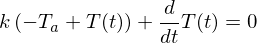

In [9]:
sympy.Eq(ode)

In [10]:
ode_sol = sympy.dsolve(ode)

In [11]:
ode_sol

In [12]:
 ode_sol.lhs

In [13]:
ode_sol.rhs

In [14]:
ics = {T(0): T0}

In [15]:
ics

In [16]:
C_eq = ode_sol.subs(t, 0).subs(ics)

In [17]:
C_eq

In [18]:
C_sol = sympy.solve(C_eq)

In [19]:
C_sol

In [20]:
ode_sol.subs(C_sol[0])

In [21]:
def apply_ics(sol, ics, x, known_params):
    """
    Apply the initial conditions (ics), given as a dictionary on
    the form ics = {y(0): y0, y(x).diff(x).subs(x, 0): yp0, ...},
    to the solution of the ODE with independent variable x.
    The undetermined integration constants C1, C2, ... are extracted
    from the free symbols of the ODE solution, excluding symbols in
    the known_params list.
    """
    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)) .subs(x, 0).subs(ics) for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)
    return sol.subs(sol_params)

In [22]:
ode_sol

In [23]:
apply_ics(ode_sol, ics, t, [k, Ta])

In [24]:
 t, omega0, gamma= sympy.symbols("t, omega_0, gamma", positive=True)

In [25]:
 x = sympy.Function("x")

In [26]:
ode = x(t).diff(t, 2) + 2 * gamma * omega0 * x(t).diff(t) + omega0**2 * x(t)

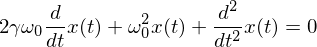

In [27]:
 sympy.Eq(ode)

In [28]:
ode_sol = sympy.dsolve(ode)

In [29]:
ode_sol

In [30]:
 ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}

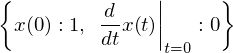

In [31]:
ics 

In [32]:
x_t_sol = apply_ics(ode_sol, ics, t, [omega0, gamma])

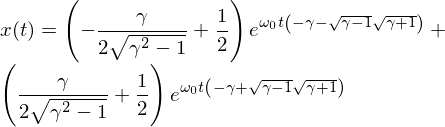

In [33]:
x_t_sol

In [34]:
x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)

In [35]:
x_t_critical

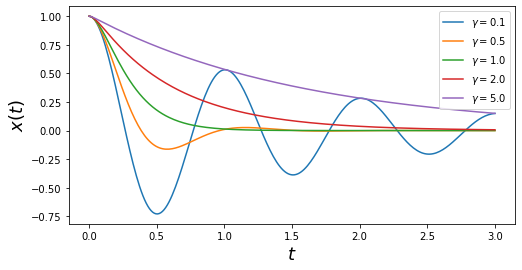

In [43]:
fig, ax = plt.subplots(figsize=(8, 4))
tt = np.linspace(0, 3, 250)
w0 = 2 * sympy.pi
for g in [0.1, 0.5, 1, 2.0, 5.0]:
    if g == 1:
         x_t = sympy.lambdify(t, x_t_critical.subs({omega0: w0}), 'numpy')
    else:
          x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega0: w0, gamma: g}), 'numpy')
    ax.plot(tt, x_t(tt).real, label=r"$\gamma = %.1f$" % g)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x(t)$", fontsize=18)
ax.legend()

In [44]:
x = sympy.symbols("x")

In [45]:
y = sympy.Function("y")

In [46]:
f = y(x)**2 + x

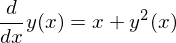

In [47]:
sympy.Eq(y(x).diff(x), f)

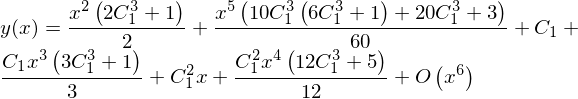

In [48]:
sympy.dsolve(y(x).diff(x) - f)

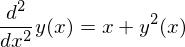

In [49]:
sympy.Eq(y(x).diff(x, x), f)

In [58]:
 def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5),  
y_lim=(-5, 5), ax=None):
        f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
        x_vec = np.linspace(x_lim[0], x_lim[1], 20)
        y_vec = np.linspace(y_lim[0], y_lim[1], 20)

        if ax is None:
            _, ax = plt.subplots(figsize=(4, 4))

        dx = x_vec[1] - x_vec[0]
        dy = y_vec[1] - y_vec[0]
 
        for m, xx in enumerate(x_vec):
           for n, yy in enumerate(y_vec):
                Dy = f_np(xx, yy) * dx
                Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
                Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
                ax.plot([xx - Dx/2, xx + Dx/2],[yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
        ax.axis('tight')
        ax.set_title(r"$%s$" %(sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),fontsize=18)
        return ax

In [59]:
 x = sympy.symbols("x")

In [60]:
 y = sympy.Function("y")

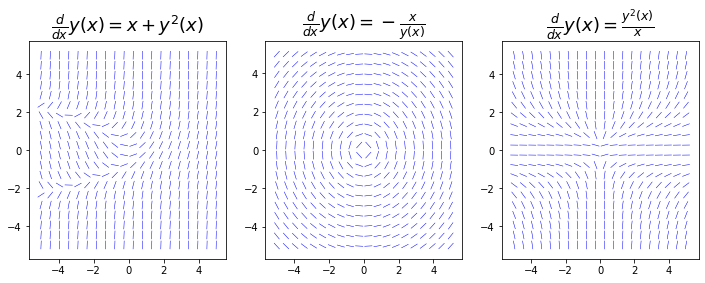

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
plot_direction_field(x, y(x), y(x)**2 + x, ax=axes[0])
plot_direction_field(x, y(x), -x / y(x), ax=axes[1])
plot_direction_field(x, y(x), y(x)**2 / x, ax=axes[2])

In [62]:
x = sympy.symbols("x")

In [63]:
y = sympy.Function("y")

In [64]:
f = y(x)**2 + x

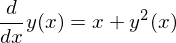

In [65]:
sympy.Eq(y(x).diff(x), f)

In [66]:
ics = {y(0): 0}

In [67]:
ode_sol = sympy.dsolve(y(x).diff(x) - f, ics=ics)

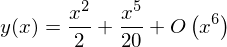

In [68]:
ode_sol

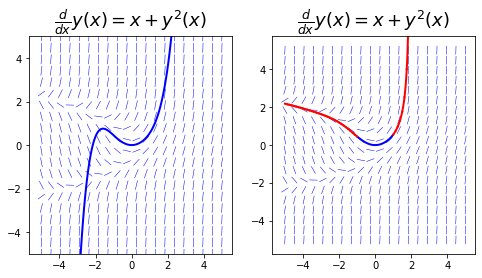

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# left panel
plot_direction_field(x, y(x), f, ax=axes[0])
x_vec = np.linspace(-3, 3, 100)
axes[0].plot(x_vec, sympy.lambdify(x, ode_sol.rhs.removeO())(x_vec), 'b', lw=2)
axes[0].set_ylim(-5, 5)

# right panel
plot_direction_field(x, y(x), f, ax=axes[1])
x_vec = np.linspace(-1, 1, 100)
axes[1].plot(x_vec, sympy.lambdify(x, ode_sol.rhs.removeO())(x_vec), 'b', lw=2)
# iteratively resolve the ODE with updated initial conditions
ode_sol_m = ode_sol_p = ode_sol
dx = 0.125
# positive x
for x0 in np.arange(1, 2., dx):
    x_vec = np.linspace(x0, x0 + dx, 100)
    ics = {y(x0): ode_sol_p.rhs.removeO().subs(x, x0)}
    ode_sol_p = sympy.dsolve(y(x).diff(x) - f, ics=ics, n=6)
    axes[1].plot(x_vec, sympy.lambdify(x, ode_sol_p.rhs.removeO())(x_vec), 'r', lw=2)
# negative x
for x0 in np.arange(-1, -5, -dx):
    x_vec = np.linspace(x0, x0 - dx, 100)
    ics = {y(x0): ode_sol_m.rhs.removeO().subs(x, x0)}
    ode_sol_m = sympy.dsolve(y(x).diff(x) - f, ics=ics, n=6)
    axes[1].plot(x_vec, sympy.lambdify(x, ode_sol_m.rhs.removeO())(x_vec), 'r', lw=2)

In [70]:
t = sympy.symbols("t", positive=True)

In [71]:
y = sympy.Function("y")

In [72]:
ode = y(t).diff(t, 2) + 2 * y(t).diff(t) + 10 * y(t) - 2 * sympy.sin(3*t)

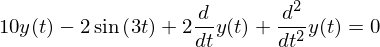

In [73]:
sympy.Eq(ode)

In [74]:
s, Y = sympy.symbols("s, Y", real=True)

In [75]:
L_y = sympy.laplace_transform(y(t), t, s)

In [76]:
L_y

In [77]:
L_ode = sympy.laplace_transform(ode, t, s, noconds=True)

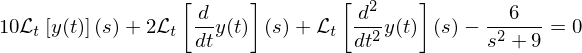

In [78]:
sympy.Eq(L_ode)

In [85]:
def laplace_transform_derivatives(e):
    """
    Evaluate laplace transforms of derivatives of functions
    """
    if isinstance(e, sympy.LaplaceTransform):
        if isinstance(e.args[0], sympy.Derivative):
            d, t, s = e.args
            n = len(d.args) - 1
            return ((s**n) * sympy.LaplaceTransform(d.args[0], t, s)-sum([s**(n-i) * sympy.diff(d.args[0], t, i-1).subs(t, 0) for i in range(1, n+1)]))

    if isinstance(e, (sympy.Add, sympy.Mul)):
        t = type(e)
        return t(*[laplace_transform_derivatives(arg) for arg in e.args])

    return e

In [86]:
L_ode_2 = laplace_transform_derivatives(L_ode)

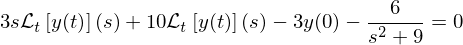

In [87]:
sympy.Eq(L_ode_2)

In [88]:
L_ode_3 = L_ode_2.subs(L_y, Y)

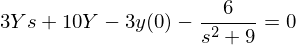

In [89]:
sympy.Eq(L_ode_3)

In [90]:
ics = {y(0): 1, y(t).diff(t).subs(t, 0): 0}

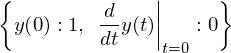

In [91]:
ics

In [92]:
L_ode_4 = L_ode_3.subs(ics)

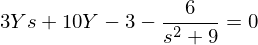

In [93]:
sympy.Eq(L_ode_4)

In [94]:
Y_sol = sympy.solve(L_ode_4, Y)

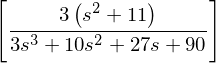

In [95]:
Y_sol

In [96]:
y_sol = sympy.inverse_laplace_transform(Y_sol[0], s, t)

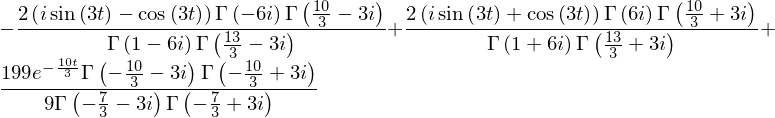

In [97]:
sympy.simplify(y_sol)

In [98]:
 x = sympy.symbols("x")

In [99]:
y = sympy.Function("y")

In [100]:
 f = y(x)**2 + x

In [101]:
 f_np = sympy.lambdify((y(x), x), f)

In [102]:
y0 = 0

In [103]:
 xp = np.linspace(0, 1.9, 100)

In [104]:
yp = integrate.odeint(f_np, y0, xp)

In [105]:
xm = np.linspace(0, -5, 100)

In [106]:
ym = integrate.odeint(f_np, y0, xm)

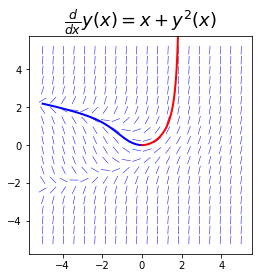

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_direction_field(x, y(x), f, ax=ax)
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)

In [108]:
a, b, c, d = 0.4, 0.002, 0.001, 0.7

In [109]:
def f(xy, t):
    x, y = xy
    return [a * x - b * x * y, c * x * y - d * y]

In [110]:
 xy0 = [600, 400]

In [111]:
t = np.linspace(0, 50, 250)

In [112]:
xy_t = integrate.odeint(f, xy0, t)

In [113]:
xy_t.shape

Text(0, 0.5, 'Number of predators')

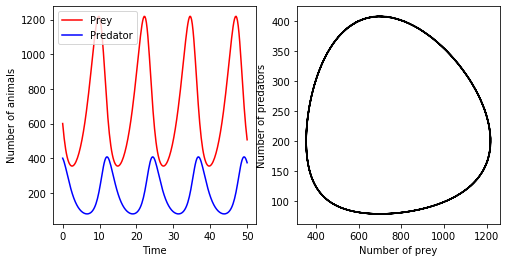

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(t, xy_t[:,0], 'r', label="Prey")
axes[0].plot(t, xy_t[:,1], 'b', label="Predator")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Number of animals")
axes[0].legend()
axes[1].plot(xy_t[:,0], xy_t[:,1], 'k')
axes[1].set_xlabel("Number of prey")
axes[1].set_ylabel("Number of predators")

In [115]:
def f(xyz, t, sigma, rho, beta):
    x, y, z = xyz
    return [sigma * (y - x),x * (rho - z) - y,x * y - beta * z]

In [116]:
 sigma, rho, beta = 8, 28, 8/3.0

In [117]:
 t = np.linspace(0, 25, 10000)

In [118]:
 xyz0 = [1.0, 1.0, 1.0]

In [119]:
xyz1 = integrate.odeint(f, xyz0, t, args=(sigma, rho, beta))

In [120]:
xyz2 = integrate.odeint(f, xyz0, t, args=(sigma, rho, 0.6*beta))

In [121]:
xyz3 = integrate.odeint(f, xyz0, t, args=(2*sigma, rho, 0.6*beta))

In [122]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

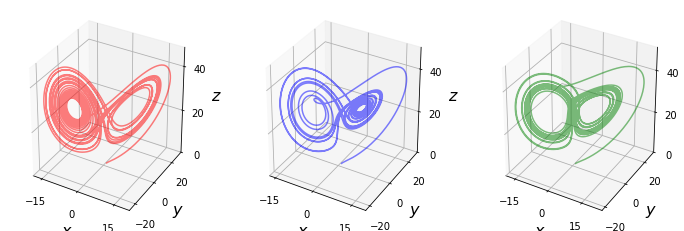

In [123]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4),subplot_kw={'projection':'3d'})
for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'),  (ax3, xyz3, 'g')]:
    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], c, alpha=0.5)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.set_zlabel('$z$', fontsize=16)
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])

In [124]:
def f(t, y, args):
    m1, k1, g1, m2, k2, g2 = args
    return [y[1], - k1/m1 * y[0] + k2/m1 * (y[2] - y[0]) - g1/m1 * y[1],y[3], - k2/m2 * (y[2] - y[0]) - g2/m2 * y[3]]

In [125]:
 m1, k1, g1 = 1.0, 10.0, 0.5

In [126]:
m2, k2, g2 = 2.0, 40.0, 0.25

In [127]:
args = (m1, k1, g1, m2, k2, g2)

In [128]:
y0 = [1.0, 0, 0.5, 0]

In [129]:
t = np.linspace(0, 20, 1000)

In [130]:
r = integrate.ode(f)

In [131]:
r.set_integrator('lsoda');

In [132]:
r.set_initial_value(y0, t[0]);

In [133]:
r.set_f_params(args);

In [134]:
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1

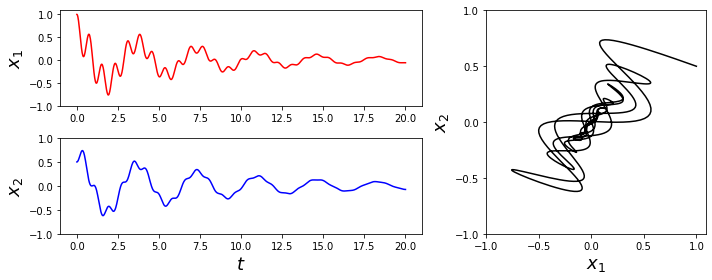

In [135]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)
# x_1 vs time plot
ax1.plot(t, y[:, 0], 'r')
ax1.set_ylabel('$x_1$', fontsize=18)
ax1.set_yticks([-1, -.5, 0, .5, 1])
# x2 vs time plot
ax2.plot(t, y[:, 2], 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2$', fontsize=18)
ax2.set_yticks([-1, -.5, 0, .5, 1])
# x1 and x2 phase space plot
ax3.plot(y[:, 0], y[:, 2], 'k')
ax3.set_xlabel('$x_1$', fontsize=18)
ax3.set_ylabel('$x_2$', fontsize=18)
ax3.set_xticks([-1, -.5, 0, .5, 1])
ax3.set_yticks([-1, -.5, 0, .5, 1])
fig.tight_layout()

In [136]:
 def jac(t, y, args):
    m1, k1, g1, m2, k2, g2 = args
    return [[0, 1, 0, 0],[- k1/m2 - k2/m1, - g1/m1 * y[1], k2/m1, 0],[0, 0, 1, 0],[k2/m2, 0, - k2/m2, - g2/m2]]

In [137]:
r = integrate.ode(f, jac)

In [138]:
r.set_jac_params(args);

In [139]:
t, g, m1, l1, m2, l2 = sympy.symbols("t, g, m_1, l_1, m_2, l_2")

In [140]:
theta1, theta2 = sympy.symbols("theta_1, theta_2", cls=sympy.Function)

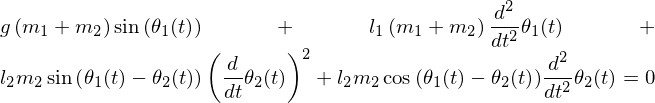

In [141]:
ode1 = sympy.Eq((m1+m2)*l1 * theta1(t).diff(t,t) +m2*l2 * theta2(t).diff(t,t) * sympy.cos(theta1(t)-theta2(t)) +m2*l2 * theta2(t).diff(t)**2 * sympy.sin(theta1(t)-theta2(t)) +g*(m1+m2) * sympy.sin(theta1(t)))
ode1

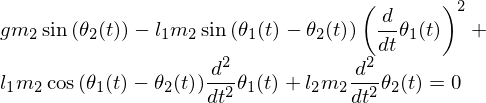

In [142]:
ode2 = sympy.Eq(m2*l2 * theta2(t).diff(t,t) +m2*l1 * theta1(t).diff(t,t) * sympy.cos(theta1(t)-theta2(t)) -m2*l1 * theta1(t).diff(t)**2 * sympy.sin(theta1(t) - theta2(t)) +m2*g * sympy.sin(theta2(t)))
ode2

In [143]:
y1, y2, y3, y4 = sympy.symbols("y_1, y_2, y_3, y_4", cls=sympy.Function)

In [144]:
varchange = {theta1(t).diff(t, t): y2(t).diff(t),theta1(t): y1(t),theta2(t).diff(t, t): y4(t).diff(t),theta2(t): y3(t)}

In [145]:
ode1_vc = ode1.subs(varchange)

In [146]:
ode2_vc = ode2.subs(varchange)

In [147]:
ode3 = y1(t).diff(t) - y2(t)

In [148]:
ode4 = y3(t).diff(t) - y4(t)

In [149]:
y = sympy.Matrix([y1(t), y2(t), y3(t), y4(t)])

In [150]:
vcsol = sympy.solve((ode1_vc, ode2_vc, ode3, ode4), y.diff(t), dict=True)

In [151]:
f = y.diff(t).subs(vcsol[0])

In [152]:
params = {m1: 5.0, l1: 2.0, m2: 1.0, l2: 1.0, g: 10.0}

In [153]:
_f_np = sympy.lambdify((t, y), f.subs(params), 'numpy')

In [154]:
f_np = lambda _t, _y, *args: _f_np(_t, _y)

In [155]:
jac = sympy.Matrix([[fj.diff(yi) for yi in y] for fj in f])

In [156]:
_jac_np = sympy.lambdify((t, y), jac.subs(params), 'numpy')

In [157]:
jac_np = lambda _t, _y, *args: _jac_np(_t, _y)

In [158]:
 y0 = [2.0, 0, 0, 0]

In [159]:
tt = np.linspace(0, 20, 1000)

In [160]:
r = integrate.ode(f_np, jac_np).set_initial_value(y0, tt[0])

In [162]:
dt = tt[1] - tt[0]
yy = np.zeros((len(tt), len(y0)))
idx = 0
while r.successful() and r.t < tt[-1]:
    yy[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1

In [163]:
theta1_np, theta2_np = yy[:, 0], yy[:, 2]

In [164]:
x1 = params[l1] * np.sin(theta1_np)
y1 = -params[l1] * np.cos(theta1_np)
x2 = x1 + params[l2] * np.sin(theta2_np)
y2 = y1 - params[l2] * np.cos(theta2_np)

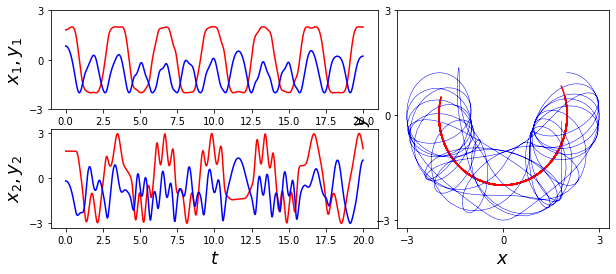

In [165]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)

ax1.plot(tt, x1, 'r')
ax1.plot(tt, y1, 'b')
ax1.set_ylabel('$x_1, y_1$', fontsize=18)
ax1.set_yticks([-3, 0, 3])

ax2.plot(tt, x2, 'r')
ax2.plot(tt, y2, 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2, y_2$', fontsize=18)
ax2.set_yticks([-3, 0, 3])

ax3.plot(x1, y1, 'r')
ax3.plot(x2, y2, 'b', lw=0.5)
ax3.set_xlabel('$x$', fontsize=18)
ax3.set_ylabel('$y$', fontsize=18)
ax3.set_xticks([-3, 0, 3])
ax3.set_yticks([-3, 0, 3])